# Домашнее задание. Урок 2. Keras

## Практическое задание

Используем набор примеров fashion-MNIST

1.  Опишите - какой результата получен в нейросети в зависимости от:
  -  числа нейронов в слое(для 2-хслойной сети),
  - числа слоев (2, 3, 5, 10) при близких размерах сети (близкое число тренируемых парметров).
  - фиксируйте для тренировочного и тестового набора метрики accuracy.
2.  Проверьте работу разных оптимизаторов (SGD, Adam, RMSProp) для одной из моделей п.1.Фиксируйте для тренировочного и тестового набора метрики accuracy.

3. Сделайте вывод - что помогло вам улучшить качество классификации в нейросети на тестовом наборе?

4. Для одного варианта сетей сформируйте матрицу ошибок по классам. Оцените качество модели по каждому классу отдельно (полнота , точность). Сделайте вывод.

## Загрузка данных Fashion_MNIST

In [98]:
import pandas as pd
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical


In [99]:
(train_imagef, train_labelf), (test_imagef, test_labelf) = fashion_mnist.load_data()

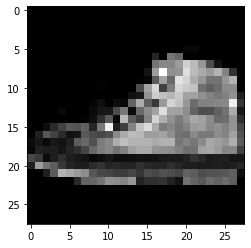

In [100]:
plt.imshow(train_imagef[5002, :, :])
plt.gray()
plt.show()

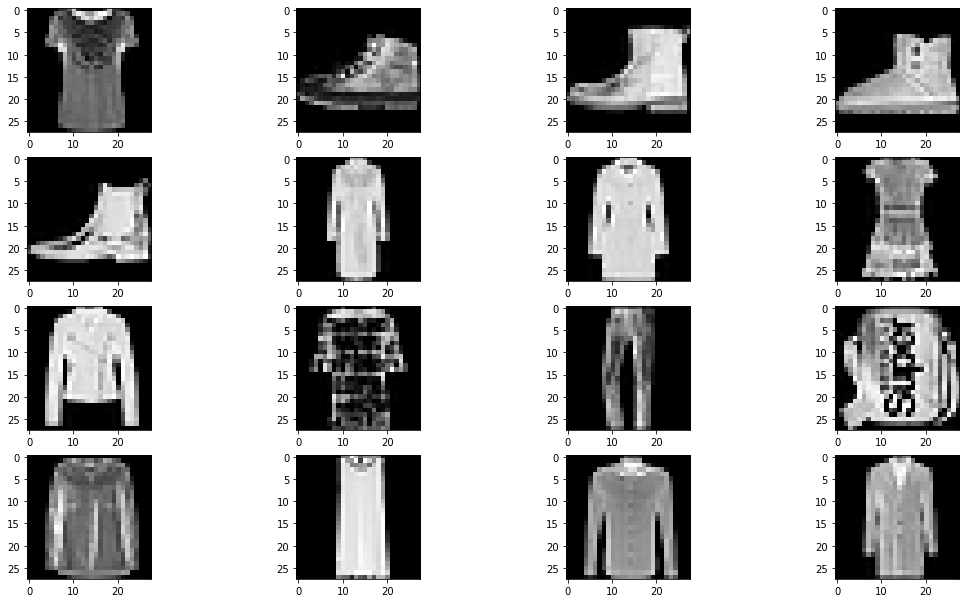

In [101]:
fig, axs = plt.subplots(4, 4)
fig.set_size_inches(18.5, 10.5)
m = 1
for i in range(4):
    for j in range(4):
        axs[i, j].imshow(train_imagef[5000 + m, :, :])
        m += 1

In [102]:
# Normalize the images.
train_imagesi = (train_imagef / 127) - 1
test_imagesi = (test_imagef / 127) - 1

# Flatten the images.
train_images = train_imagesi.reshape((-1, 784))
test_images = test_imagesi.reshape((-1, 784))

print(train_images.shape)  # (60000, 784)
print(test_images.shape)  # (10000, 784)

(60000, 784)
(10000, 784)


In [103]:
train_cat_labels = to_categorical(train_labelf)
test_cat_labels = to_categorical(test_labelf)

In [104]:
keras.backend.backend()

'tensorflow'

In [105]:
# Build the model.
model = Sequential([
    Dense(64, activation='tanh', input_shape=(784,)),
    Dense(64, activation='tanh'),  # Скрытый слой из 110 нейронов с активацией tanh
    Dense(10, activation='softmax'),
    # выходной слой из 10 нейронов (сколько классов, столько нейронов) + активация softmax
])

# Compile the model.
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

In [106]:
model.summary()

Model: "sequential_47"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_176 (Dense)           (None, 64)                50240     
                                                                 
 dense_177 (Dense)           (None, 64)                4160      
                                                                 
 dense_178 (Dense)           (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [107]:
# Train the model.
history = model.fit(
    train_images, train_cat_labels,
    epochs=10, batch_size=1024, validation_split=0.2
)


KeyboardInterrupt



In [ ]:
history.history['accuracy'][-1]

In [ ]:
# Evaluate the model.
model.evaluate(test_images, test_cat_labels)

In [ ]:
# Predict on the first 5 test images.
predictions = model.predict(test_images[:5])

# Print our model's predictions.
print(np.argmax(predictions, axis=1))

# Check our predictions against the ground truths.
print(test_labelf[:5])

In [ ]:
plt.figure(figsize=(15, 7))
plt.plot(history.history['loss'], label='потери для тренировки')
plt.plot(history.history['val_loss'], label='потери для валидации')
plt.xlabel('эпох')
plt.ylabel('loss')
plt.legend()
plt.grid('On')
plt.title('потери от эпох')
plt.show()

In [ ]:
# создаем модель model
model_init = Sequential([
    Dense(64, activation='relu', input_shape=(784,)),
    Dense(10, activation='softmax'),
])

# число рабочих эпох
# будем изменять оптимизаторы

In [ ]:
arr_accuracy = []
epochs = 20
for num_neuro in list(range(1, 10)) + list(range(10, 70, 10)):
    # создаем рабочую модель modeli куда будем загружать эти вес (она должна быть идентичной структуры)
    model = Sequential([
        Dense(num_neuro, activation='relu', input_shape=(784,)),
        Dense(10, activation='softmax'),
    ])
    # компилируем modeli с одним из оптимизаторов
    # model.set_weights(model_init.get_weights())
    model.compile(optimizer='NAdam', loss='categorical_crossentropy', metrics=['accuracy'])

    # проводим обучение модели
    history = model.fit(
        train_images,
        train_cat_labels,
        epochs=epochs,
        batch_size=1024, validation_split=0.2, verbose=0
    )
    accuracy_train = history.history['accuracy'][-1]
    _, accuracy_test = model.evaluate(test_images, test_cat_labels)
    arr_accuracy.append([num_neuro, accuracy_train, accuracy_test])
    print(f' N нейронов {num_neuro}, Точность трен {accuracy_train:.3}, Точность тест {accuracy_test:.3}')


In [ ]:
arr_accuracy

In [ ]:
import pandas as pd

pd.DataFrame(arr_accuracy, columns=['#neuro', 'accuracy_tren', 'accuracy_test'])

### Вывод

> Приемлемые результаты (0.78/0.78) обучения модели анализу образов получены уже при количестве нейронов = 4

> Насыщение в обучении наступает при количестве нейронов 30-40 (0.89/0.86). Дальнейшее обучение при этом не приносит сильных результатов

In [129]:
# Dense Layers
# We have two Dense layers in our model. The calculation of the parameter numbers uses the following formula.
# param_number = output_channel_number * (input_channel_number + 1)

def build_model_layer(layers):
    model = Sequential(name='my_model3')
    model.add(Dense(10, activation='relu', input_shape=(784,)))
    for k in range(layers):
        model.add(Dense(16 - layers, activation='tanh'))
    model.add(Dense(10, activation='softmax'))
    return model

In [130]:
def print_str(str):
    if 'Total params:' in str:
        print(str)


for layers in [2, 3, 5, 10]:
    build_model_layer(layers).summary(print_fn=print_str)

Total params: 8,364
Total params: 8,497
Total params: 8,619
Total params: 8,364


In [137]:
arr_accuracy = []
epochs = 200
for layers in [2, 3, 5, 10]:
    model = build_model_layer(layers)

    model.compile(optimizer='NAdam', loss='categorical_crossentropy', metrics=['accuracy'])

    # проводим обучение модели
    history = model.fit(
        train_images,
        train_cat_labels,
        epochs=epochs,
        batch_size=1024, validation_split=0.2, verbose=0
    )
    accuracy_train = history.history['accuracy'][-1]
    _, accuracy_test = model.evaluate(test_images, test_cat_labels)
    arr_accuracy.append([layers, accuracy_train, accuracy_test])
    print(f' N слоев {layers}, Точность трен {accuracy_train:.3}, Точность тест {accuracy_test:.3}')

313/313 [==============================] - 1s 3ms/step - loss: 0.4595 - accuracy: 0.8485
 N слоев 2, Точность трен 0.908, Точность тест 0.849
313/313 [==============================] - 2s 8ms/step - loss: 0.4768 - accuracy: 0.8473
 N слоев 3, Точность трен 0.908, Точность тест 0.847
313/313 [==============================] - 1s 4ms/step - loss: 0.4989 - accuracy: 0.8531
 N слоев 5, Точность трен 0.908, Точность тест 0.853
313/313 [==============================] - 1s 4ms/step - loss: 0.5503 - accuracy: 0.8395
 N слоев 10, Точность трен 0.889, Точность тест 0.84


### Количество эпох - 20

In [136]:
pd.DataFrame(arr_accuracy, columns=['#layers', 'accuracy_tren', 'accuracy_test'])

,#layers,accuracy_tren,accuracy_test
0,2,0.862292,0.8340
1,3,0.860917,0.8368
2,5,0.859479,0.8307
3,10,0.800812,0.7901


### Количество эпох - 200

In [138]:
pd.DataFrame(arr_accuracy, columns=['#layers', 'accuracy_tren', 'accuracy_test'])

,#layers,accuracy_tren,accuracy_test
0,2,0.907521,0.8485
1,3,0.908479,0.8473
2,5,0.907812,0.8531
3,10,0.889333,0.8395
